# 1. Imports

In [1]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

from tabulate                import tabulate
from IPython.display         import Image
from sklearn.preprocessing   import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import (accuracy_score, confusion_matrix, 
                                     classification_report)

# 2. Loading Data

In [2]:
df = pd.read_csv('dataset/churn.csv')

## 2.1 Basic Information

In [3]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\
Basic Information:")
print(df.info())
print("\
Descriptive Statistics:")
print(df.describe())

Dataset Shape: (10000, 14)
Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
Descriptive Statistics:
         RowNumber 

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3. Data Description

## 3.1 Data Types

In [5]:
df1 = df.copy()
df1.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## 3.2 Descriptive Statistical

In [6]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

In [7]:
# Central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()

m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,RowNumber,1.00,10000.00,9999.00,5.000500e+03,5.000500e+03,2886.751332,0.000000,-1.200000
1,CustomerId,15565701.00,15815690.00,249989.00,1.569094e+07,1.569074e+07,71932.589224,0.001149,-1.196113
2,CreditScore,350.00,850.00,500.00,6.505288e+02,6.520000e+02,96.648466,-0.071607,-0.425726
3,Age,18.00,92.00,74.00,3.892180e+01,3.700000e+01,10.487282,1.011320,1.395347
4,Tenure,0.00,10.00,10.00,5.012800e+00,5.000000e+00,2.892030,0.010991,-1.165225
5,Balance,0.00,250898.09,250898.09,7.648589e+04,9.719854e+04,62394.285254,-0.141109,-1.489412
6,NumOfProducts,1.00,4.00,3.00,1.530200e+00,1.000000e+00,0.581625,0.745568,0.582981
7,HasCrCard,0.00,1.00,1.00,7.055000e-01,1.000000e+00,0.455818,-0.901812,-1.186973
8,IsActiveMember,0.00,1.00,1.00,5.151000e-01,1.000000e+00,0.499772,-0.060437,-1.996747
9,EstimatedSalary,11.58,199992.48,199980.90,1.000902e+05,1.001939e+05,57507.617221,0.002085,-1.181518


# 4. Feature Engineering

In [8]:
df2 = df1.copy()

## 4.1 Hypothesis Mind Map

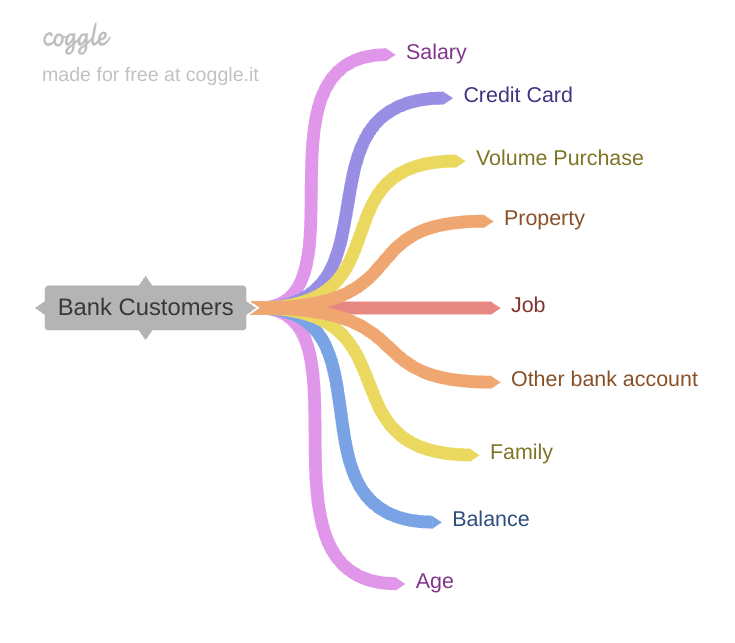

In [9]:
Image('img/mind_map.png')

## 4.2 Creating Hypotheses

**1.** Employed customers keep their accounts longer

**2.** Clients with properties and assets keep their accounts longer

**3.** Active customers keep their accounts longer

**4.** High-spending customers keep their accounts longer

**5.** Customers who have credit cards keep their accounts longer

**6.** Customers with higher salaries keep their accounts longer

**7.** Customers with accounts at other banks keep their accounts for less time

**8.** Customers who have children keep their accounts longer

**9.** Customers who have account balances keep their accounts for longer

**10.** Older customers keep their accounts longer

**11.** Customers with higher credit scores keep their accounts longer

**12.** Men keep their accounts longer than women

**13.** Germans keep their accounts longer

**14.** Customers who have more products keep their accounts longer

**15.** Long-time bank customers keep their accounts for longer

## 4.3 Selected Hypotheses

**1.** Active customers keep their accounts longer

**2** Customers who have credit cards keep their accounts longer

**3.** Customers with higher salaries keep their accounts longer

**4.** Customers who have account balances keep their accounts for longer

**5.** Older customers keep their accounts longer

**6.** Customers with higher credit scores keep their accounts longer

**7.** Men keep their accounts longer than women

**8.** Germans keep their accounts longer

**9.** Customers who have more products keep their accounts longer

**10.** Long-time bank customers keep their accounts for longer

# 5. Variable Filtering

In [10]:
df3 = df2.copy()

In [11]:
cols_drop = ['RowNumber', 'Surname']

df3 = df3.drop(cols_drop, axis=1)

# 6. Exploratory Data Analysis (EDA)

In [12]:
df4 = df3.copy()

## 6.1 Univariate Analysis

### 6.1.1 Response Variable

<Axes: xlabel='Exited', ylabel='Count'>

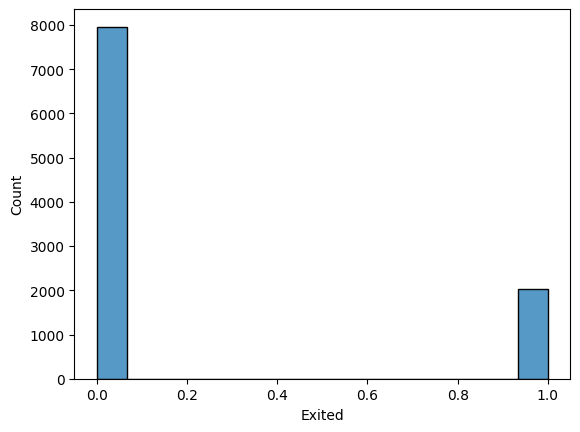

In [13]:
sns.histplot(df4['Exited'])

### 6.1.2 Numerical Variable

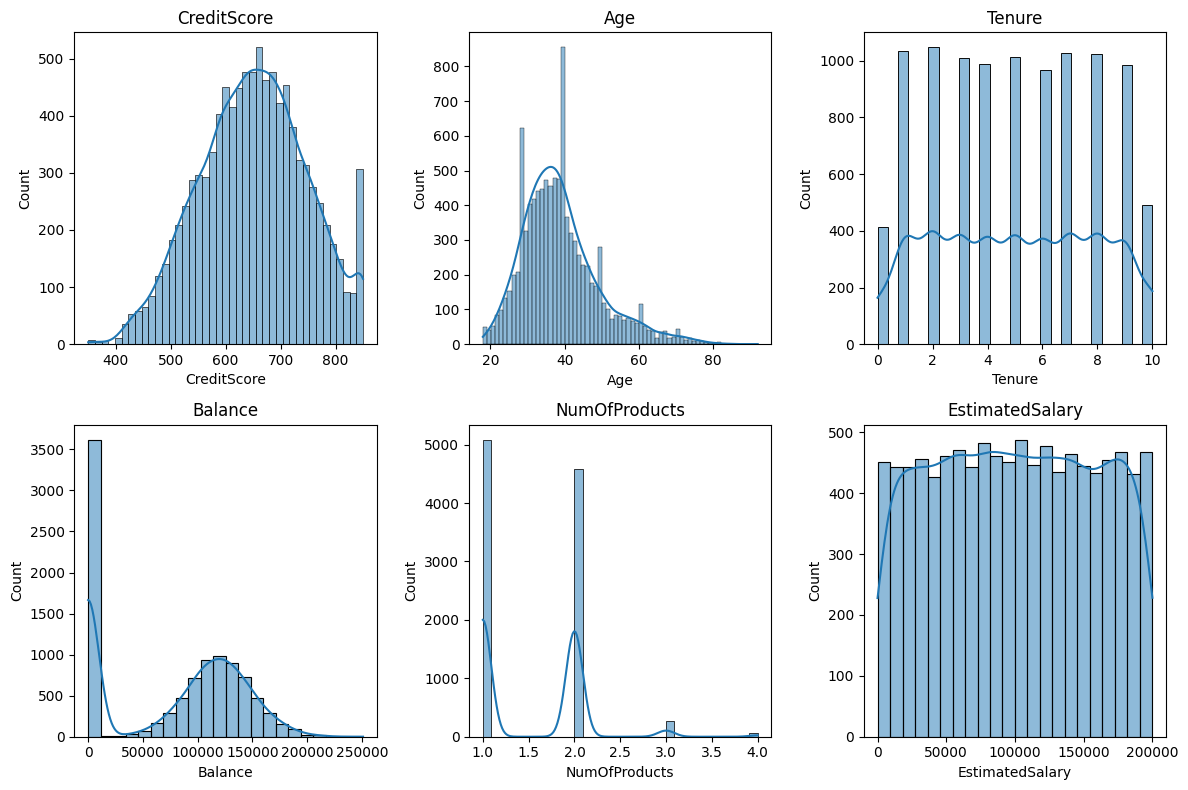

In [14]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance',
                      'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

## 6.2 Bivariate Analysis

### **H1.** Active customers keep their accounts longer

#### **True hypothesis!**

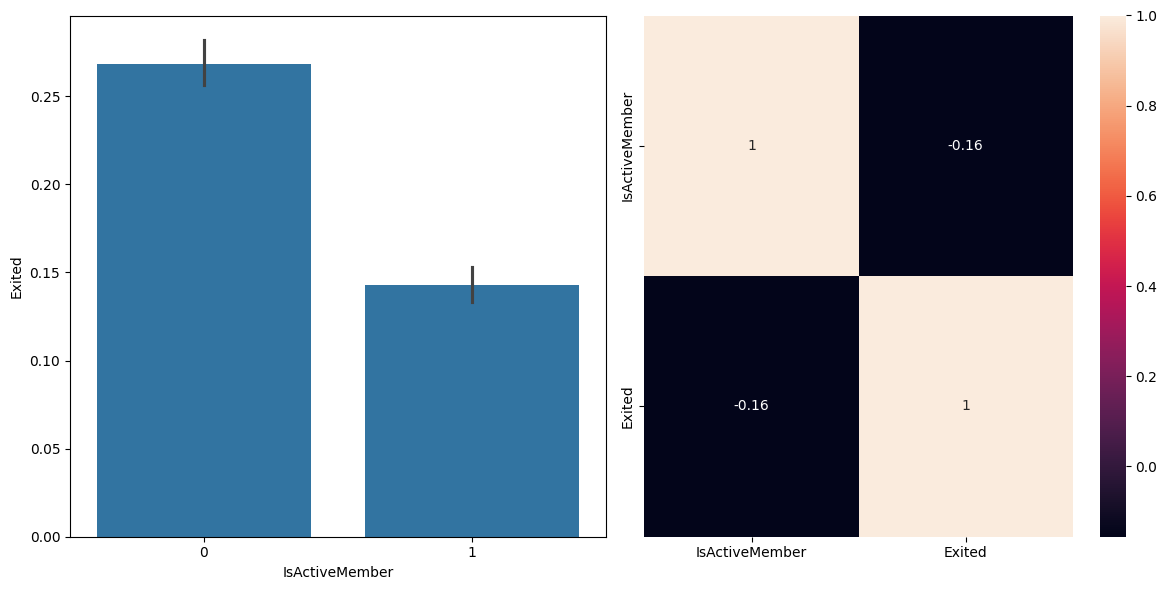

In [15]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.barplot(data=df4, x='IsActiveMember', y='Exited')

plt.subplot(1, 2, 2)
sns.heatmap(df4[['IsActiveMember', 'Exited']].corr(method='pearson'), annot=True);

plt.tight_layout()
plt.show()

### **H2** Customers who have credit cards keep their accounts longer
#### **True hypothesis!**

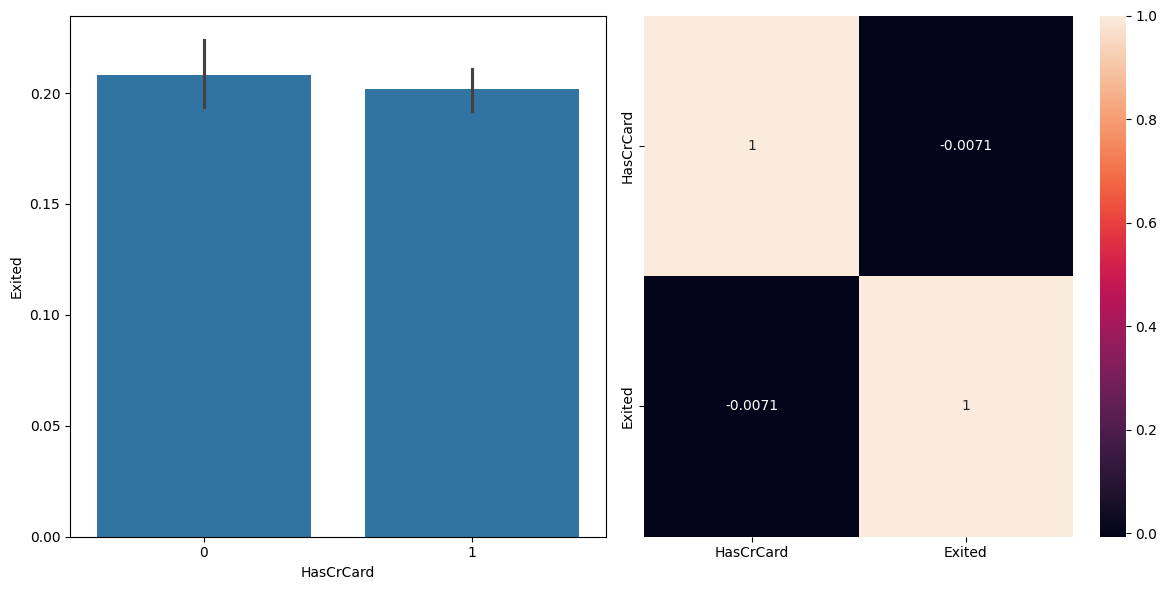

In [16]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.barplot(data=df4, x='HasCrCard', y='Exited')

plt.subplot(1, 2, 2)
sns.heatmap(df4[['HasCrCard', 'Exited']].corr(method='pearson'), annot=True);

plt.tight_layout()
plt.show()

### **H3.** Customers with higher salaries keep their accounts longer
#### **False hypothesis**: Higher-earning customers leave their bank accounts more frequently

C:\Users\Felipe\AppData\Local\Temp\ipykernel_29540\1464043780.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aux2 = df4[['EstimatedSalary_binned', 'Exited']].groupby('EstimatedSalary_binned').sum().reset_index()


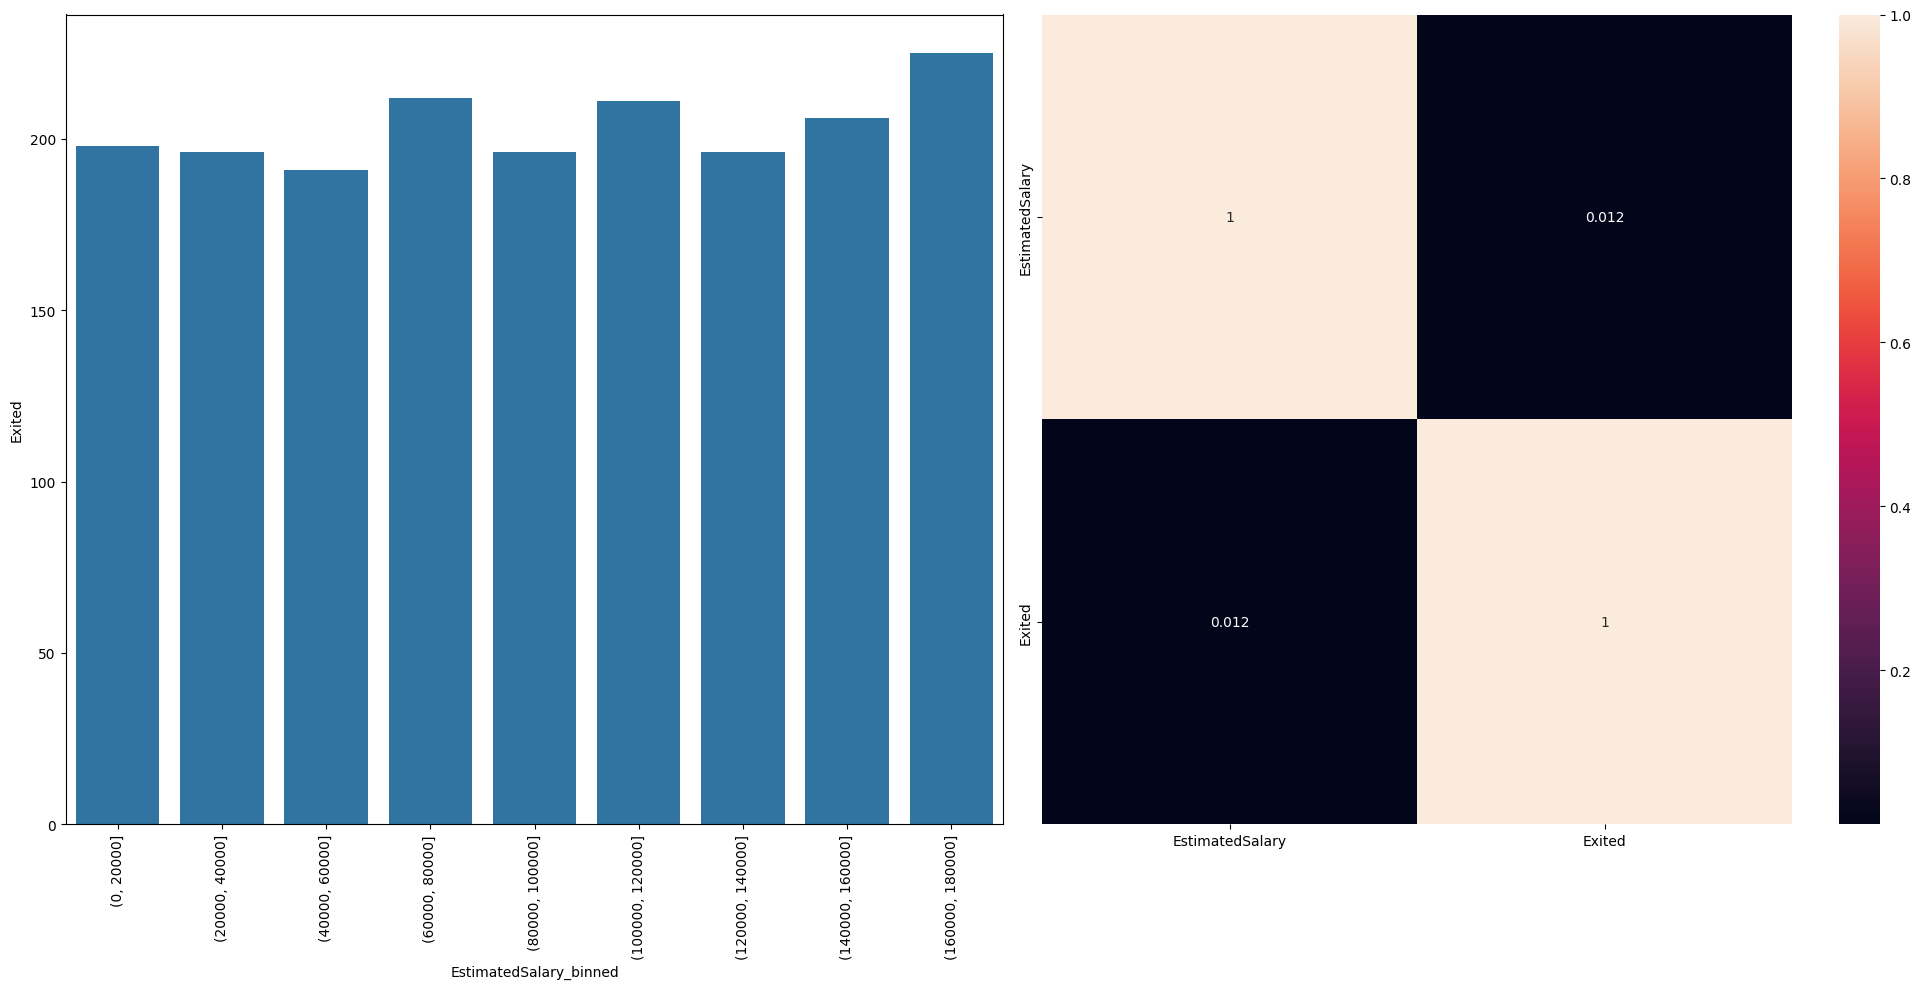

In [17]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
bins = list(np.arange(0, 200000, 20000))
df4['EstimatedSalary_binned'] = pd.cut(df4['EstimatedSalary'], bins=bins)
aux2 = df4[['EstimatedSalary_binned', 'Exited']].groupby('EstimatedSalary_binned').sum().reset_index()

sns.barplot(x='EstimatedSalary_binned', y='Exited', data=aux2);
plt.xticks(rotation=90);

plt.subplot(1, 2, 2)
sns.heatmap(df4[['EstimatedSalary', 'Exited']].corr(method='pearson'), annot=True);

plt.tight_layout()
plt.show()

### **H4.** Customers who have account balances keep their accounts for longer
#### **False Hypothesis**: The majority of customers who leave their accounts have a balance

C:\Users\Felipe\AppData\Local\Temp\ipykernel_29540\1982047040.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aux2 = df4[['Balance_binned', 'Exited']].groupby('Balance_binned').sum().reset_index()


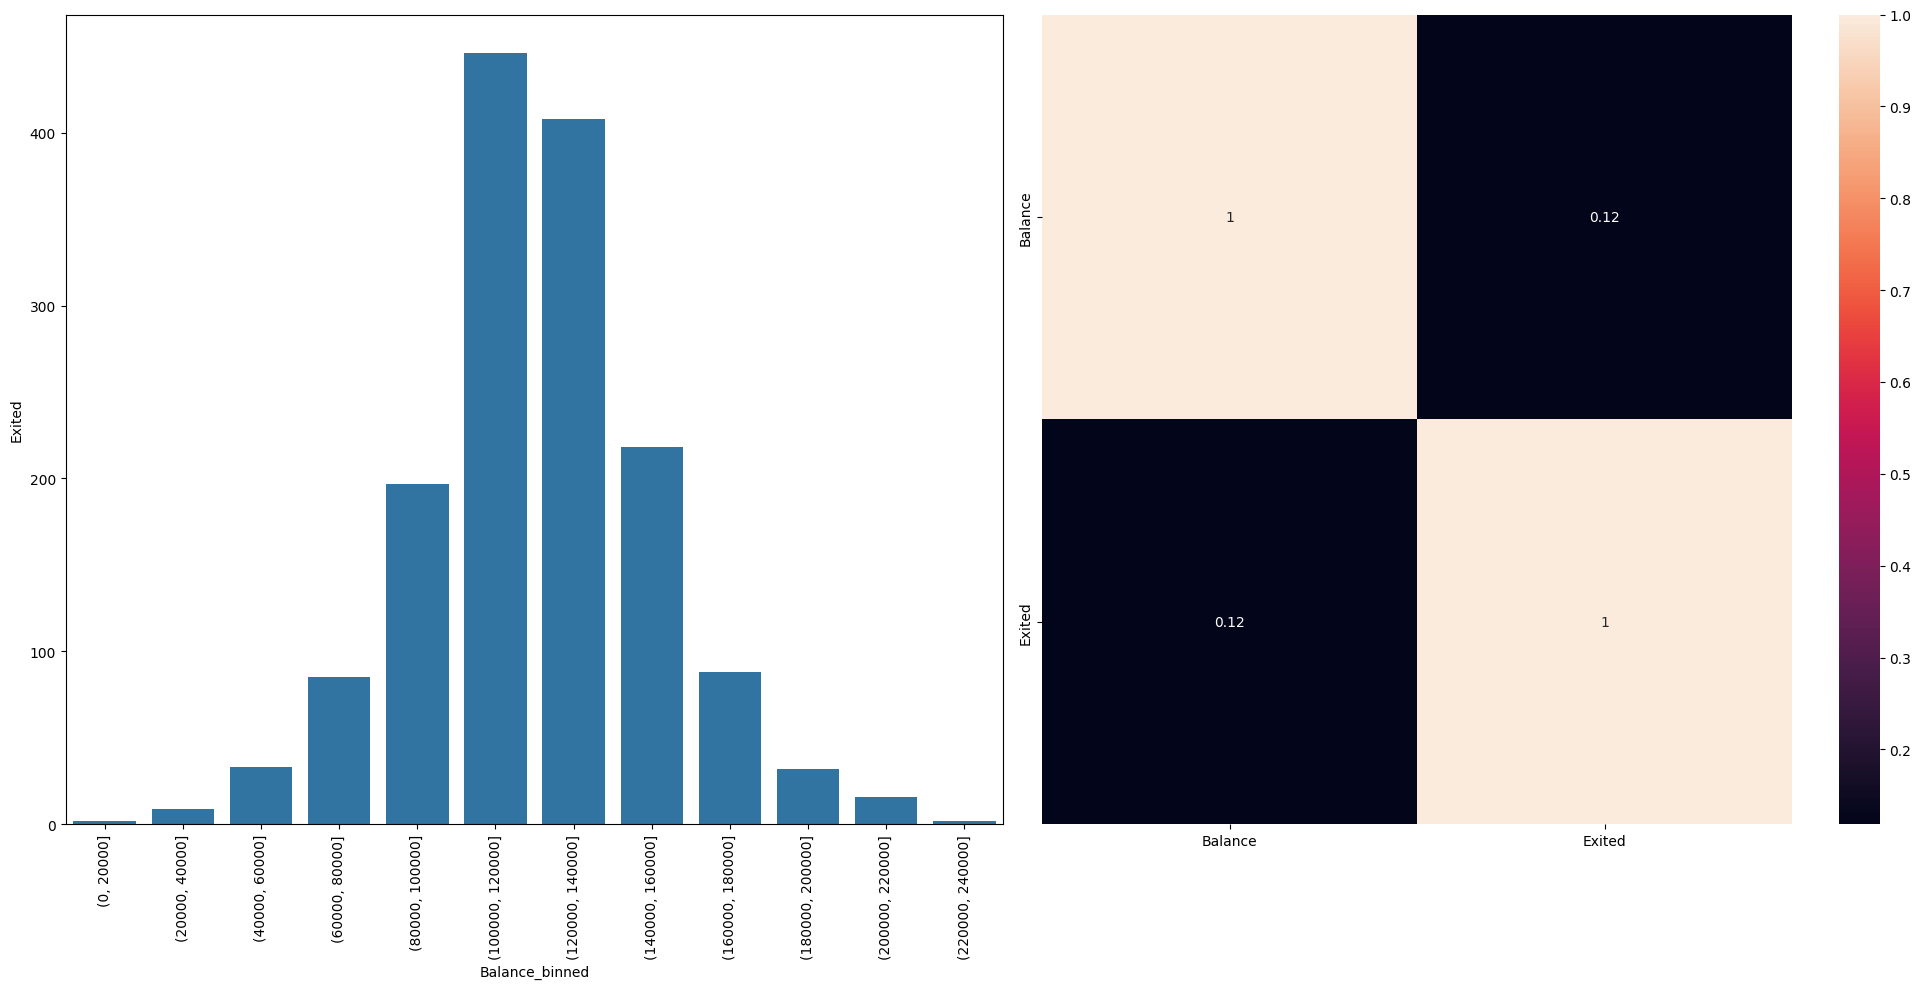

In [18]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
bins = list(np.arange(0, 260000, 20000))
df4['Balance_binned'] = pd.cut(df4['Balance'], bins=bins)
aux2 = df4[['Balance_binned', 'Exited']].groupby('Balance_binned').sum().reset_index()

sns.barplot(x='Balance_binned', y='Exited', data=aux2);
plt.xticks(rotation=90);

plt.subplot(1, 2, 2)
sns.heatmap(df4[['Balance', 'Exited']].corr(method='pearson'), annot=True);

plt.tight_layout()
plt.show()

### **H5.** Older customers keep their accounts longer
#### **True Hypothesis**: Most customers who leave their accounts are aged 38 to 53

C:\Users\Felipe\AppData\Local\Temp\ipykernel_29540\356518970.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aux2 = df4[['Age_binned', 'Exited']].groupby('Age_binned').sum().reset_index()


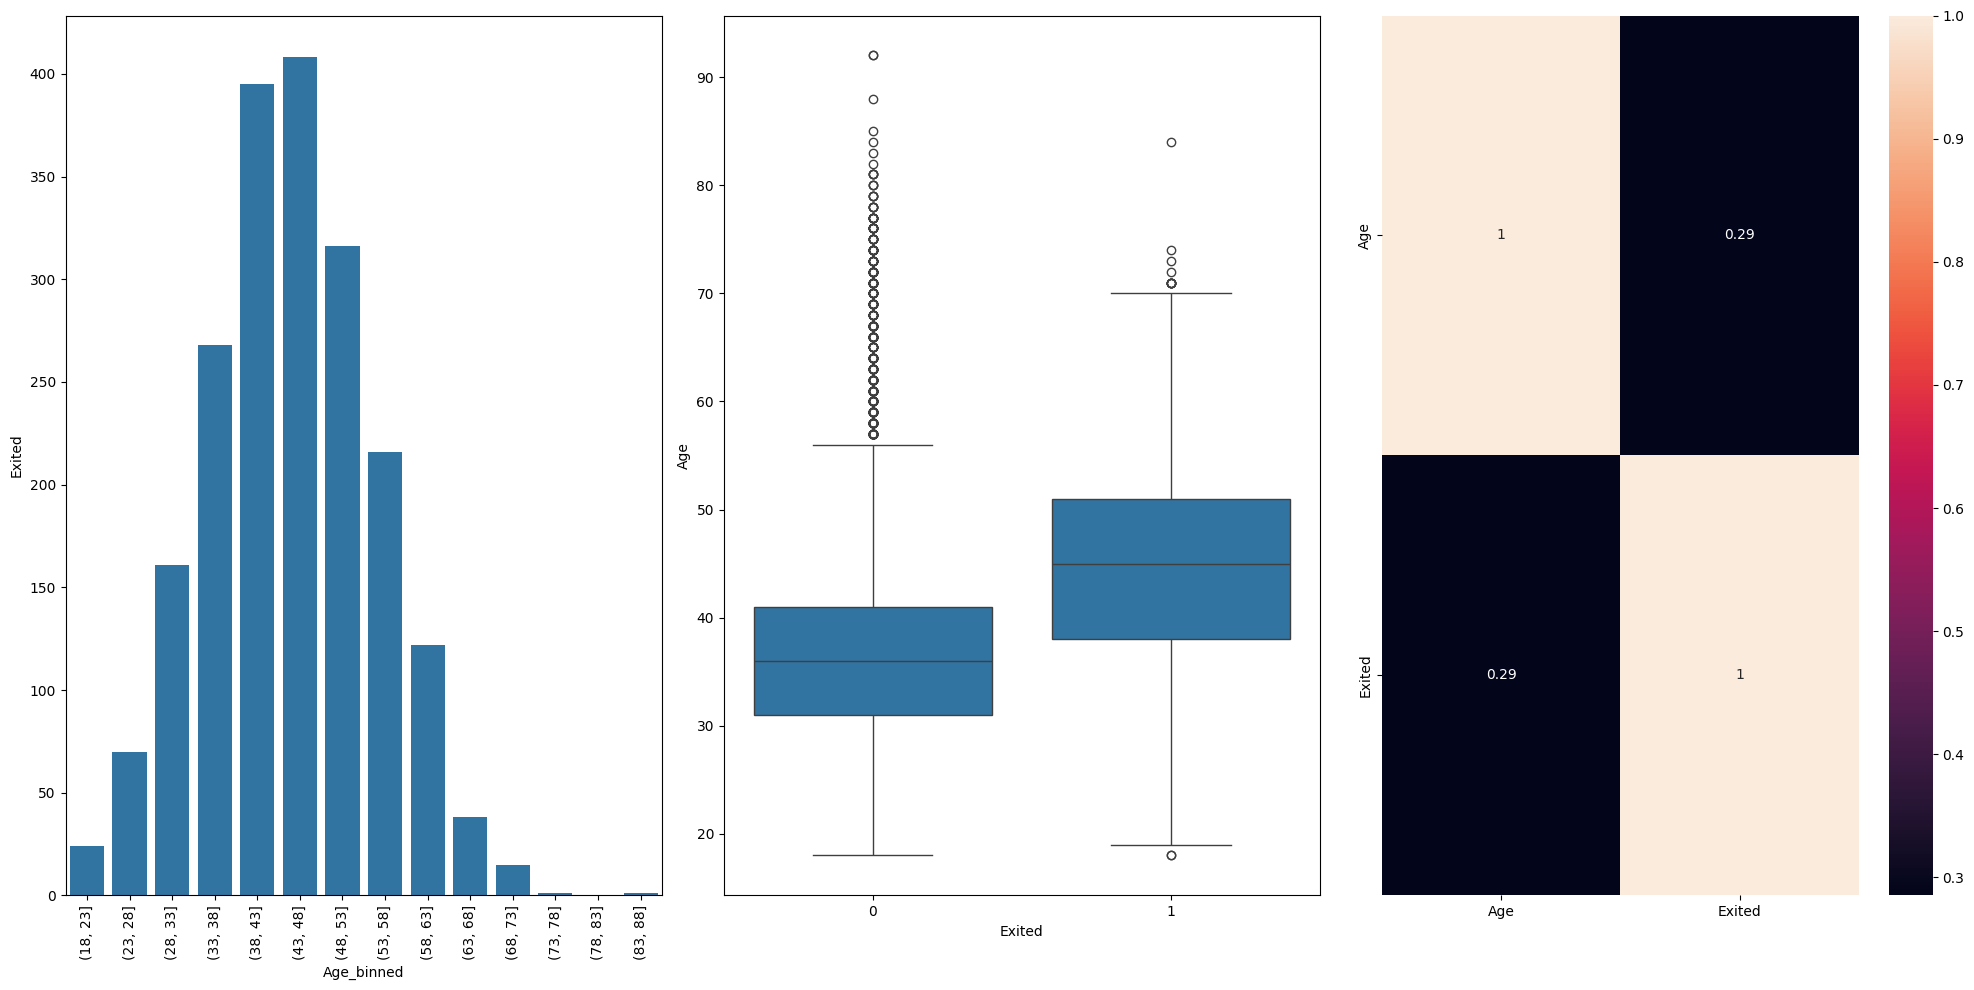

In [19]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
bins = list(np.arange(18, 92, 5))
df4['Age_binned'] = pd.cut(df4['Age'], bins=bins)
aux2 = df4[['Age_binned', 'Exited']].groupby('Age_binned').sum().reset_index()

sns.barplot(x='Age_binned', y='Exited', data=aux2);
plt.xticks(rotation=90);

plt.subplot(1, 3, 2)
sns.boxplot(data=df4, x='Exited', y='Age')


plt.subplot(1, 3, 3)
sns.heatmap(df4[['Age', 'Exited']].corr(method='pearson'), annot=True);

plt.tight_layout()
plt.show()

### **H6.** Customers with higher credit scores keep their accounts longer
#### **False Hypothesis**: Customers with high credit scores leave their accounts more often

C:\Users\Felipe\AppData\Local\Temp\ipykernel_29540\2530608578.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aux2 = df4[['CreditScore_binned', 'Exited']].groupby('CreditScore_binned').sum().reset_index()


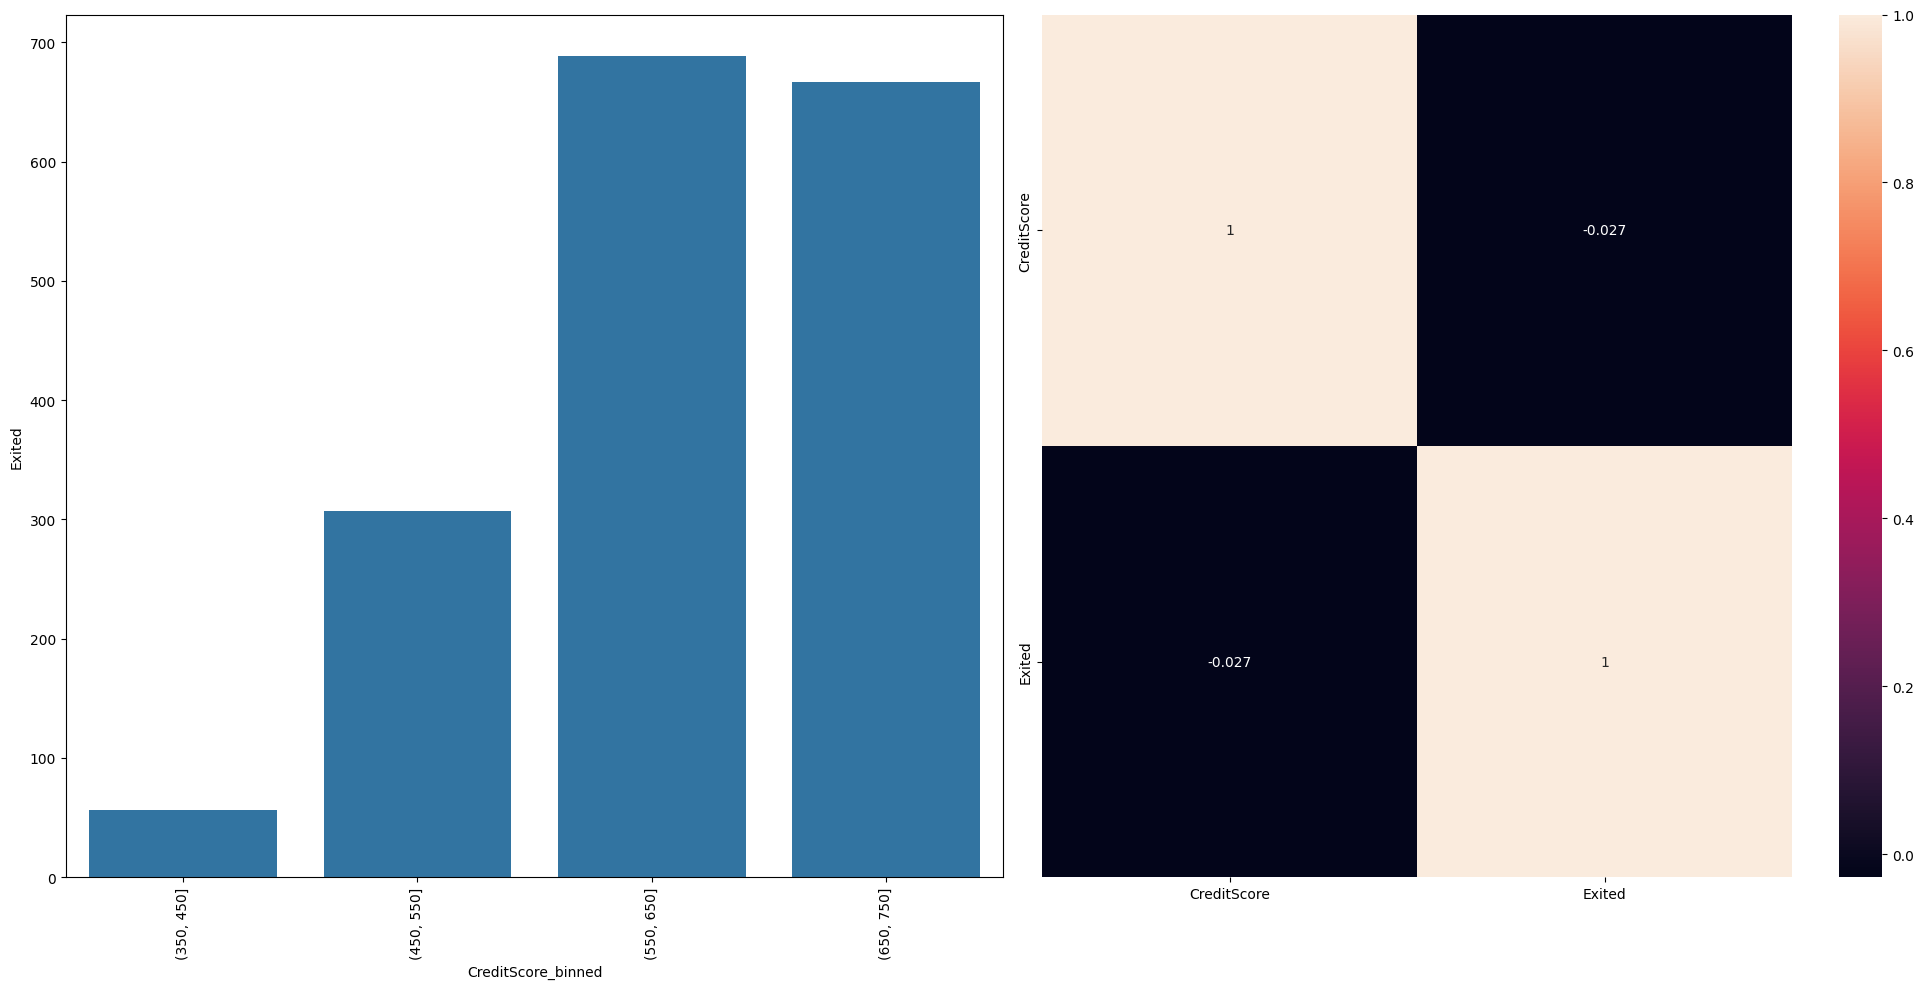

In [20]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
bins = list(np.arange(350, 850, 100))
df4['CreditScore_binned'] = pd.cut(df4['CreditScore'], bins=bins)
aux2 = df4[['CreditScore_binned', 'Exited']].groupby('CreditScore_binned').sum().reset_index()

sns.barplot(x='CreditScore_binned', y='Exited', data=aux2);
plt.xticks(rotation=90);

plt.subplot(1, 2, 2)
sns.heatmap(df4[['CreditScore', 'Exited']].corr(method='pearson'), annot=True);

plt.tight_layout()
plt.show()

### **H7.** Men keep their accounts longer than women
#### **True Hypothesis**

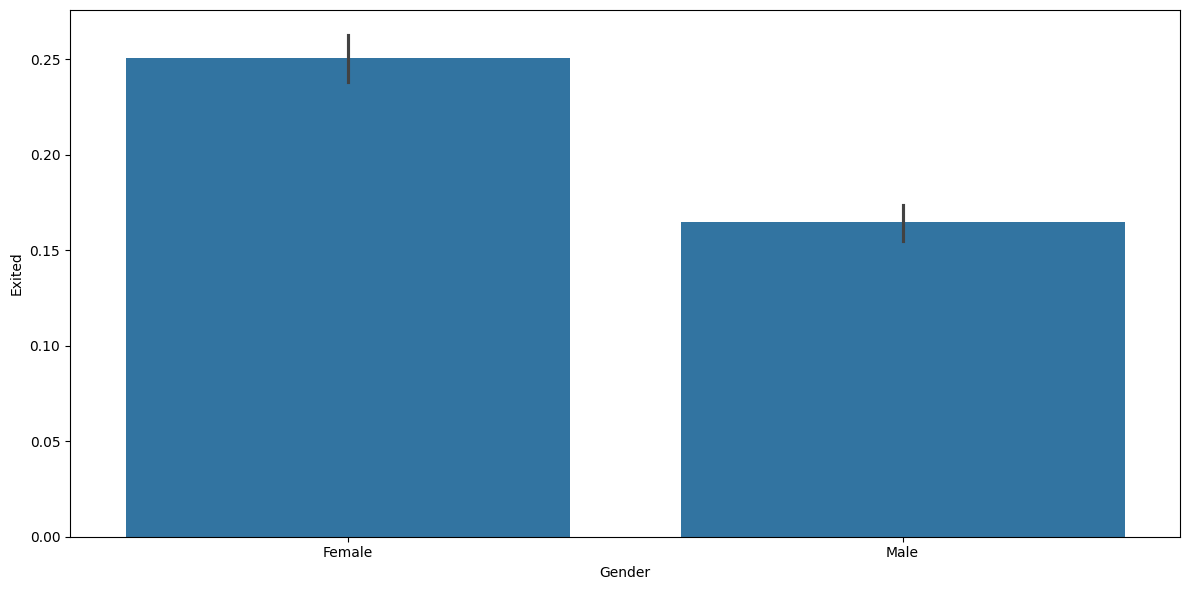

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(data=df4, x='Gender', y='Exited')

plt.tight_layout()
plt.show()

### **H8.** Germans keep their accounts longer
#### **False Hypothesis**: Germans leave their accounts more often

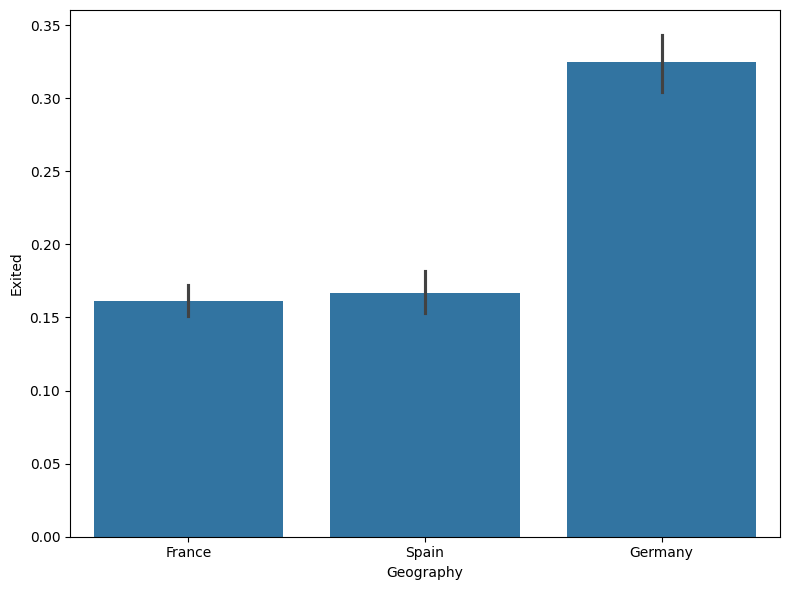

In [22]:
plt.figure(figsize=(8,6))

sns.barplot(data=df4, x='Geography', y='Exited')

plt.tight_layout()
plt.show()

### **H9.** Customers who have more products keep their accounts longer
#### **False Hypothesis**: Customers with more than two products leave more accounts

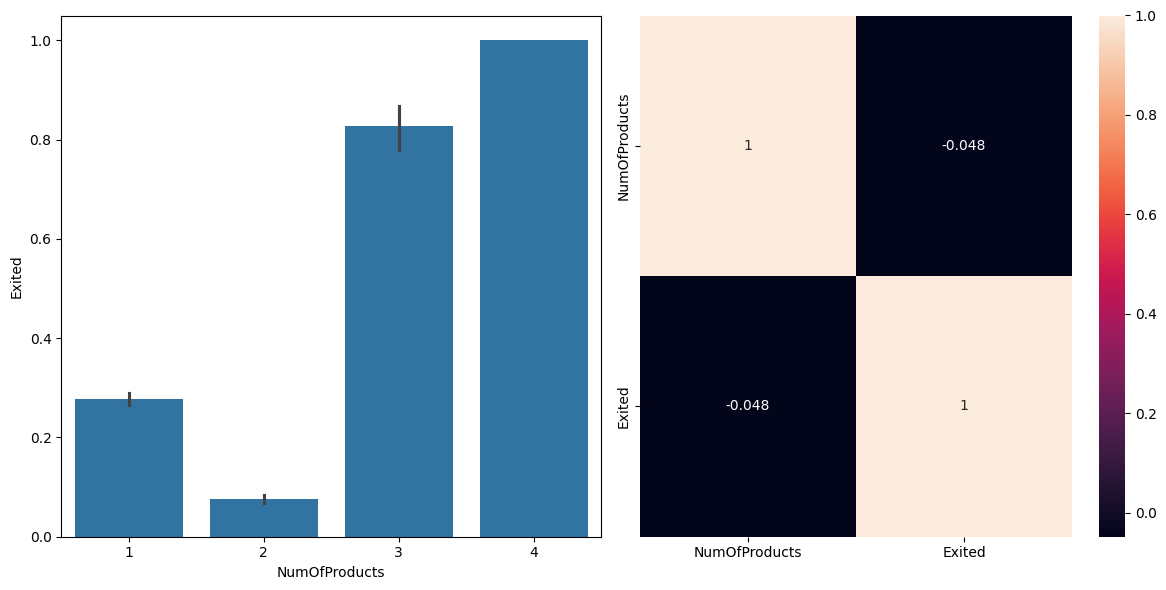

In [23]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.barplot(data=df4, x='NumOfProducts', y='Exited')

plt.subplot(1, 2, 2)
sns.heatmap(df4[['NumOfProducts', 'Exited']].corr(method='pearson'), annot=True);

plt.tight_layout()
plt.show()

### **H10.** Long-time bank customers keep their accounts for longer
#### **True Hypothesis**

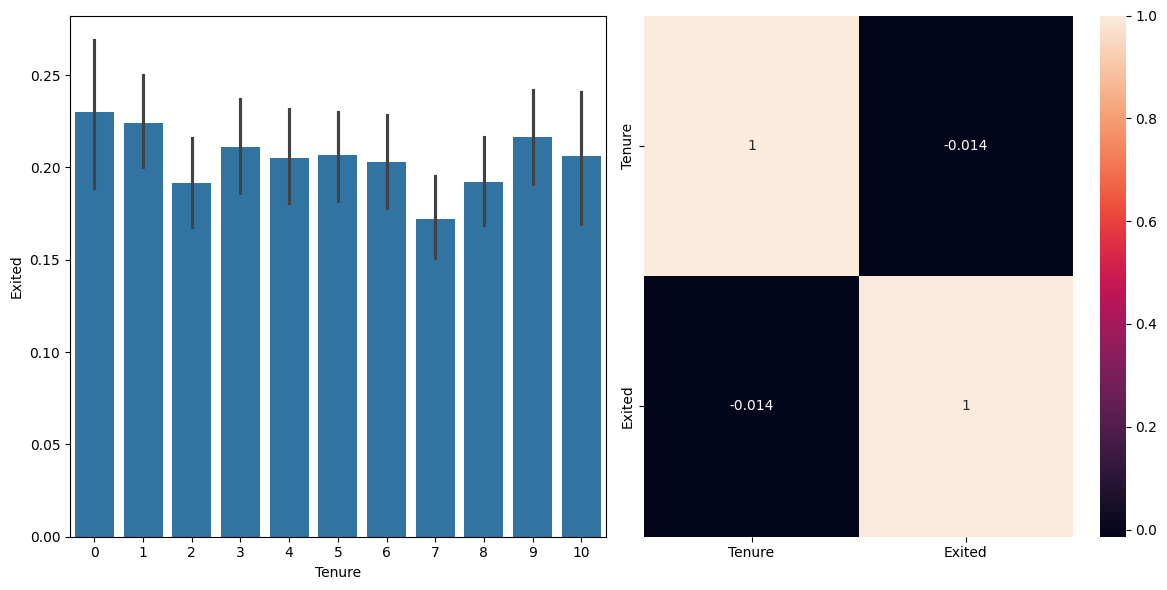

In [24]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.barplot(data=df4, x='Tenure', y='Exited')

plt.subplot(1, 2, 2)
sns.heatmap(df4[['Tenure', 'Exited']].corr(method='pearson'), annot=True);

plt.tight_layout()
plt.show()

## 6.3 Multivariate Analysis

### 6.3.1 Numerical Attributes

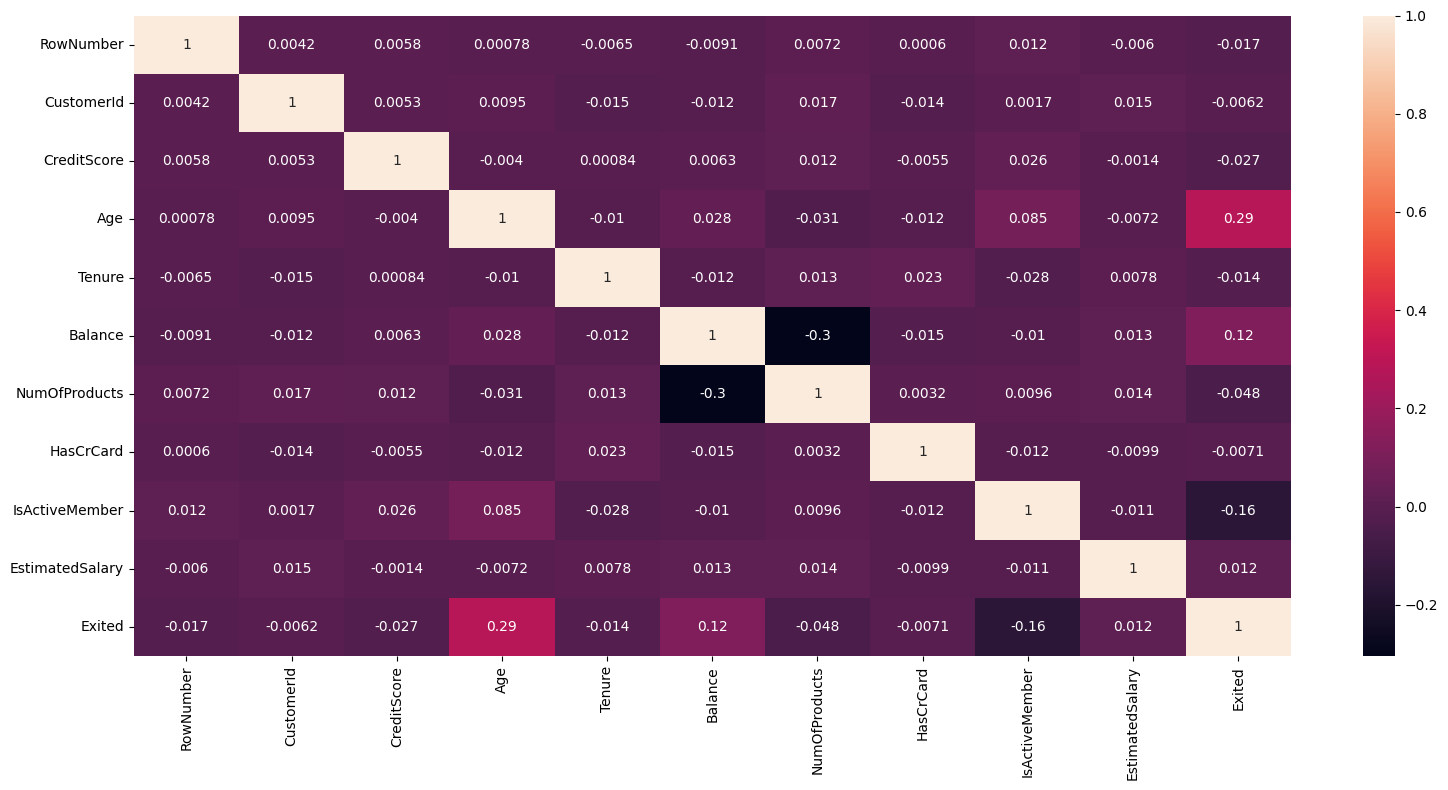

In [25]:
plt.figure(figsize=(16,8))
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, annot=True);

plt.tight_layout()
plt.show()

### 6.3.2 Categorical Attributes

In [26]:
plt.figure(figsize=(16,8))
sns.heatmap(df4[['Geography', 'Exited']].corr(method='pearson'), annot=True);

plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'France'

<Figure size 1600x800 with 0 Axes>

## **Sumarry**

In [ ]:
tab = [['Hypothesis', 'Conclusion', 'Relevance'],
       ['H1', 'True', 'Medium'],
       ['H2', 'True', 'Low'],
       ['H3', 'False', 'Low'],
       ['H4', 'False', 'Medium'],
       ['H5', 'True', 'High'],
       ['H6', 'False', 'Low'],
       ['H7', 'True', 'Medium'],
       ['H8', 'False', 'Medium'],
       ['H9', 'False', 'Low'],
       ['H10', 'True', 'Low']
    ]

print(tabulate(tab, headers='firstrow'))

Hypothesis    Conclusion    Relevance
------------  ------------  -----------
H1            True          Medium
H2            True          Low
H3            False         Low
H4            False         Medium
H5            True          High
H6            False         Low
H7            True          Medium
H8            False         Medium
H9            False         Low
H10           True          Low


# 7. Data Preparation

In [27]:
df5 = df4.copy()

In [28]:
# # Label encode categorical variables
# le = LabelEncoder()
# df5['Geography'] = le.fit_transform(df5['Geography'])
# df5['Gender'] = le.fit_transform(df5['Gender'])

# Convert categorical variables to numeric using get_dummies instead of LabelEncoder
df5 = pd.get_dummies(df5, columns=['Geography', 'Gender'], drop_first=True)

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df5[numerical_features] = scaler.fit_transform(df5[numerical_features])

# Create new features
df5['Balance_per_Product'] = df5['Balance'] / df5['NumOfProducts']
df5['Balance_per_Age'] = df5['Balance'] / df5['Age']
df5['Salary_per_Age'] = df5['EstimatedSalary'] / df5['Age']

# Show the first few rows of processed data
print("Processed Dataset Preview:")
print(df5.head())

# Check for missing values
print("\
Missing Values:")
print(df5.isnull().sum())

Processed Dataset Preview:
   CustomerId  CreditScore       Age    Tenure   Balance  NumOfProducts  \
0    15634602    -0.326221  0.293517 -1.041760 -1.225848      -0.911583   
1    15647311    -0.440036  0.198164 -1.387538  0.117350      -0.911583   
2    15619304    -1.536794  0.293517  1.032908  1.333053       2.527057   
3    15701354     0.501521  0.007457 -1.387538 -1.225848       0.807737   
4    15737888     2.063884  0.388871 -1.041760  0.785728      -0.911583   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited EstimatedSalary_binned  \
0          1               1         0.021886       1       (100000, 120000]   
1          0               1         0.216534       0       (100000, 120000]   
2          1               0         0.240687       1       (100000, 120000]   
3          0               0        -0.108918       0        (80000, 100000]   
4          1               1        -0.365276       0         (60000, 80000]   

         Balance_binned Age_binned Credit

# 8. Machine Learning Modeling

In [29]:
df6 = df5.copy()

In [30]:
X = df6.drop(['CustomerId', 'Exited', 'EstimatedSalary_binned',
              'Balance_binned', 'Age_binned', 'CreditScore_binned',
              'Balance_per_Product', 'Balance_per_Age', 
              'Salary_per_Age'], axis=1)  
y = df6['Exited']  # target

In [31]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Random Forest Model Training
model = RandomForestClassifier(n_estimators=2000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\
Feature Importance:")
print(feature_importance)

# Model evaluation
print("Acuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Feature Importance:
              feature  importance
1                 Age    0.237580
7     EstimatedSalary    0.146272
0         CreditScore    0.142620
3             Balance    0.140954
4       NumOfProducts    0.131937
2              Tenure    0.081698
6      IsActiveMember    0.041139
8   Geography_Germany    0.025966
10        Gender_Male    0.019015
5           HasCrCard    0.018886
9     Geography_Spain    0.013932
Acuracy: 0.867
Confusion Matrix:
 [[1548   59]
 [ 207  186]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76     

# 9. Conlusion

The classification report shows an overall accuracy of 87%, with a higher
precision and recall for non-churned customers compared to churned ones.

The feature importance indicates that Age, EstimatedSalary, and CreditScore are
the most significant predictors of customer churn.

Some insights:

- Rate churn overall is 20,37%
- Most customers who leave their accounts are aged 38 to 53. Life and home 
  insurance, in addition to good pension products, should retain part of this
  audience
- More exclusive and qualified products can retain high-earning customers
- Understand why customers with large account balances leave their accounts.
  Competitive balance returns can retain these customers.
- Offering credit and financing products with competitive rates can retain
  customers with high credit rates for longer